In [1]:
#Chernoff-Hoeffding Bound, tighter distribution than Gaussian
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [2]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [3]:
class Bandit(object):
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x

In [4]:
def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label="real p: %.4f" % b.p)
  plt.title("Bandit distributions after %s trials" % trial)
  plt.legend()
  plt.show()

In [8]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  for i in range(NUM_TRIALS):

    # take a sample from each bandit
    bestb = None
    maxsample = -1
    allsamples = [] # let's collect these just to print for debugging
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f" % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print("current samples: %s" % allsamples)
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bestb.pull()

    # update the distribution for the bandit whose arm we just pulled
    bestb.update(x)

current samples: ['0.2296', '0.6712', '0.9474']


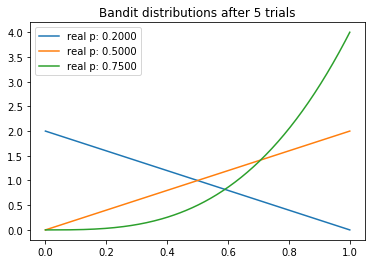

current samples: ['0.1884', '0.6056', '0.8650']


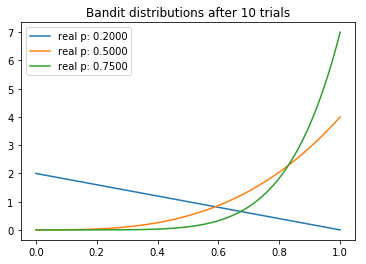

current samples: ['0.4808', '0.8548', '0.8546']


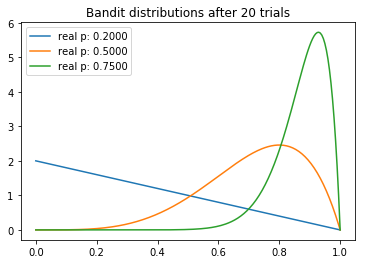

current samples: ['0.2122', '0.8385', '0.7394']


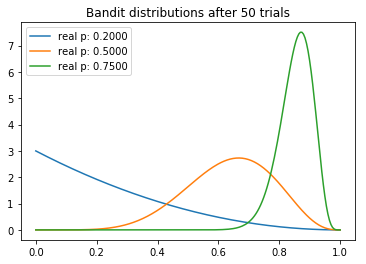

current samples: ['0.1987', '0.5431', '0.8539']


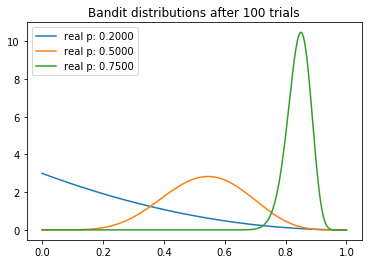

current samples: ['0.0534', '0.3756', '0.7230']


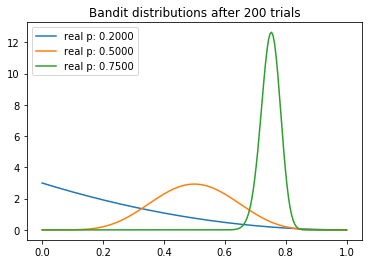

current samples: ['0.0744', '0.4102', '0.7399']


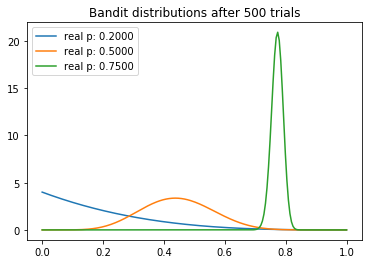

current samples: ['0.1554', '0.3053', '0.7596']


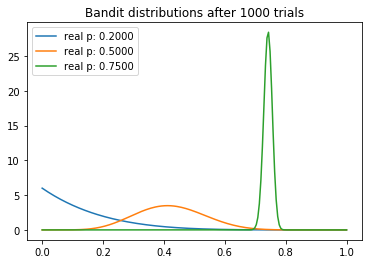

current samples: ['0.3185', '0.5273', '0.7365']


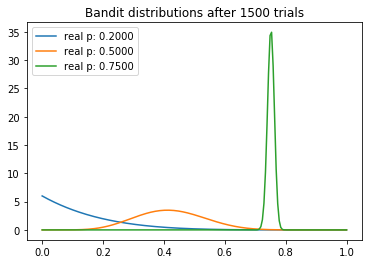

current samples: ['0.5266', '0.3824', '0.7528']


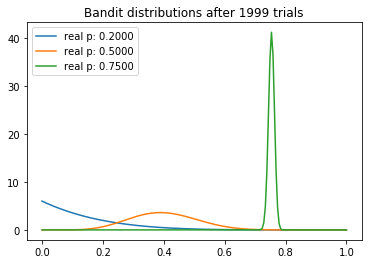

In [9]:
if __name__ == "__main__":
  experiment()